<a href="https://colab.research.google.com/github/worldwidewebss/Redes-Complexas/blob/main/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inara Yasmin Donda Acosta 11811089
Atividade 2

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import pearsonr
     

def setup_graph(g):
  print("Original Network")
  print("Nº of nodes: ", len(g))
  print("Nº of edges: ", g.number_of_edges())
  
  g = g.to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))

  print("Biggest connected component")
  gcc = sorted(nx.connected_components(g), key=len, reverse=True)
  g = g.subgraph(gcc[0])
  print("Nº of nodes: ", len(g))
  print("Nº of edges: ", g.number_of_edges())

  return g

Exercício 1

In [2]:
from numpy  import *
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import networkx as nx


In [5]:
import matplotlib.pyplot as plt


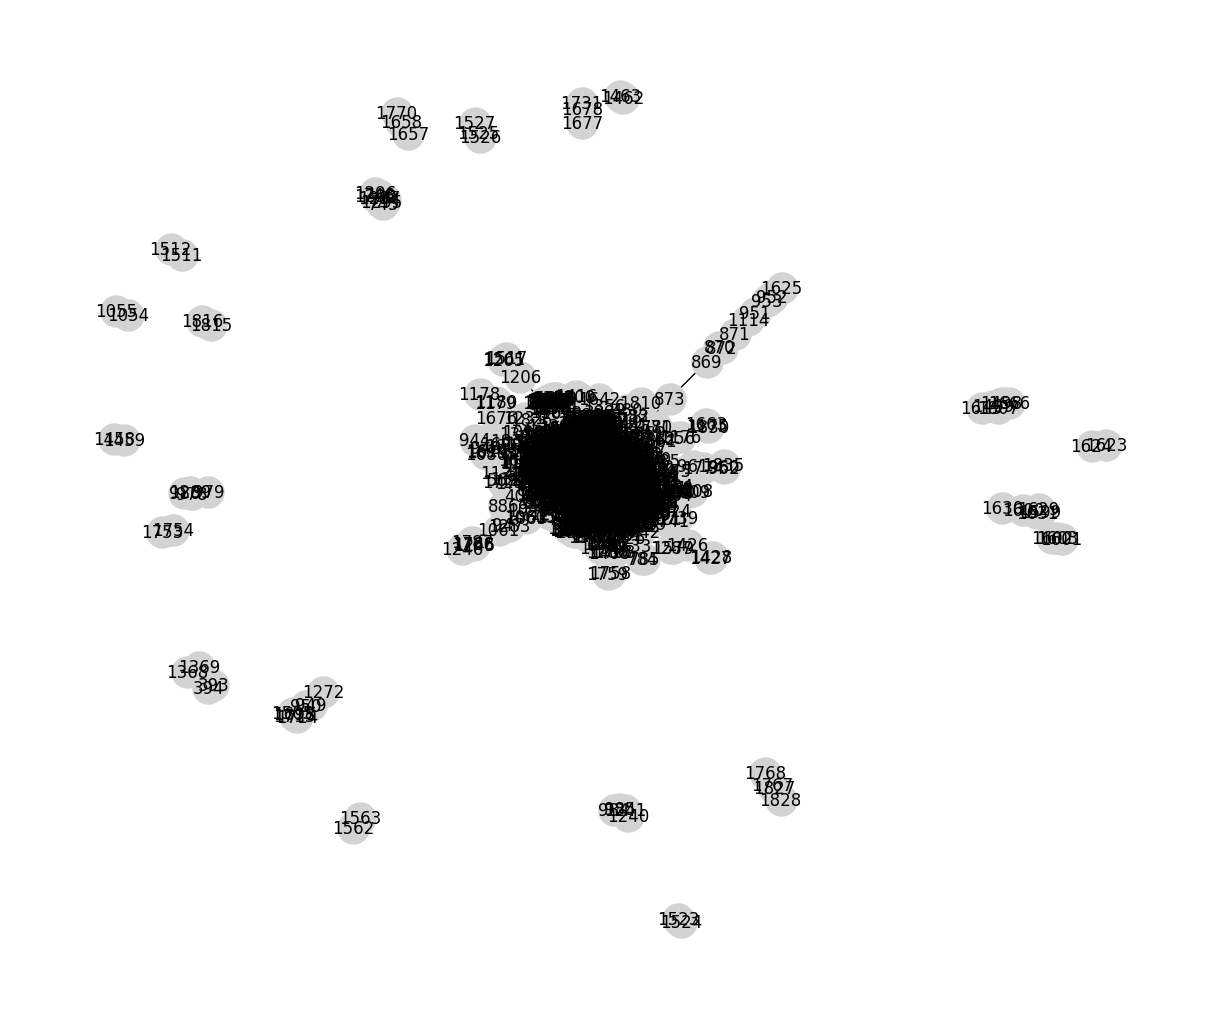

In [6]:
G= G=nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/hamsterster.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [7]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [8]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [9]:
G = nx.convert_node_labels_to_integers(G, first_label=0)


In [10]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 1788
Number of edges: 12476


In [11]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)
else:
    print("The graph has more than one connected component")

Average shortest path length: 3.4526


In [12]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 14


Exercício 2

In [25]:
g = nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/USairport500.txt", nodetype=int)


In [26]:
g = setup_graph(g)


Original Network
Nº of nodes:  500
Nº of edges:  2980
Biggest connected component
Nº of nodes:  500
Nº of edges:  2980


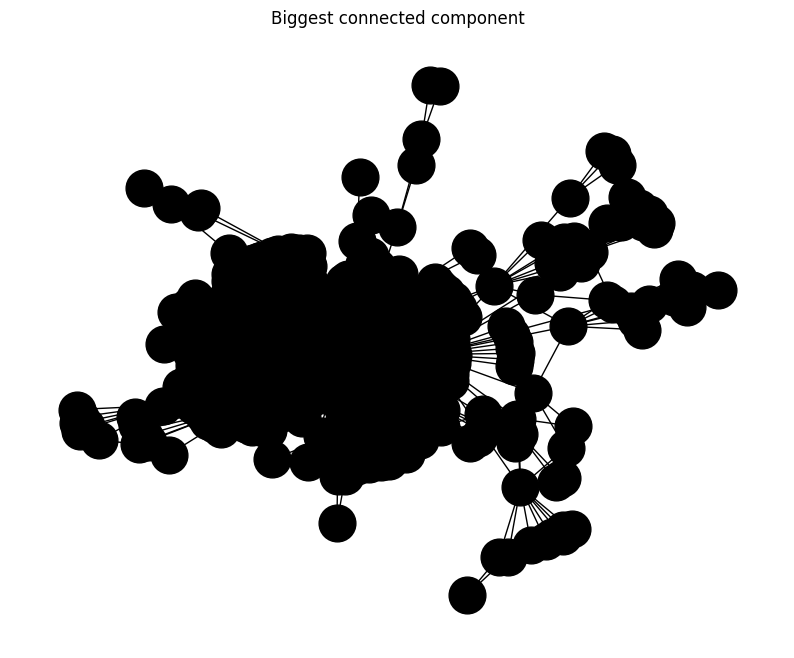

In [27]:

plt.figure(figsize=(10, 8))
plt.title("Biggest connected component")
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="Black",font_color="b",edge_color="Black", font_size=1, node_size=700, with_labels = False)

In [28]:


avg = nx.average_shortest_path_length(g)
print("Average shortest path length: ", avg)

Average shortest path length:  2.9910300601202406


In [29]:

X = np.array(nx.floyd_warshall_numpy(g))
Y = []
# Appends the values from the upper triangle of the 
# distances matrix.
for i in range(len(X)):
  for j in range(i+1, len(X)):
    Y.append(X[i][j])

print("Mean = ", "%1.2f"%np.mean(Y))
print("Variance = ", "%1.2f"% np.var(Y))

Mean =  2.99
Variance =  0.82


Exercício 3

In [30]:
from numpy  import *
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [32]:
import networkx as nx

In [37]:
g = nx.read_edgelist("//content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/advogato.txt", nodetype=int)
g = setup_graph(g)
r = nx.degree_assortativity_coefficient(g)
print("Assortativity = ","%3.4f"%r)

Original Network
Nº of nodes:  6539
Nº of edges:  43277
Biggest connected component
Nº of nodes:  5042
Nº of edges:  39227
Assortativity =  -0.0957


Exercício 4

In [40]:

g = nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/USairport500.txt", nodetype=int)
g = setup_graph(g)

Original Network
Nº of nodes:  500
Nº of edges:  2980
Biggest connected component
Nº of nodes:  500
Nº of edges:  2980


In [41]:

path = dict(nx.shortest_path_length(g))
path = np.bincount([length for source in path for length in path[source].values()])

Pk = path / sum(path)
H = 0 
for p in Pk:
  if(p > 0):
    H = H - p * math.log(p, 2)

print("SHannon entropy of the shortest paths = ", "%1.2f"%H)

SHannon entropy of the shortest paths =  1.90


Exercício 5

In [42]:
g = nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/word_adjacencies.txt", nodetype=int)
g = setup_graph(g)

Original Network
Nº of nodes:  112
Nº of edges:  425
Biggest connected component
Nº of nodes:  112
Nº of edges:  425


In [43]:
knn = list(nx.average_neighbor_degree(g).values())
knn = np.array(knn)

vk = dict(g.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        #average clustering among all the nodes with degree k
        av_knn = np.mean(knn[aux]) 
        knnk.append(av_knn)
        ks.append(k)

corr, _ = pearsonr(ks, knnk)
print("Pearsons correlation =", "%1.3f"%corr)

Pearsons correlation = -0.711
